# MACHINE LEARNING MODEL

## Predicting Price of Diamonds

The aim of the project is to build a machine learning model to predict the price of diamonds based on different explanatory variables describing aspects of diamonds.


We aim to minimise the difference between the real price, and the estimated price by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).



====================================================================================================

In [9]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to build the models
from sklearn.linear_model import Lasso

# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from matplotlib import style
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# to visualise al the columns in the dataframe


In [2]:
# load dataset
# We  load the datasets with the engineered values: we built and saved this datasets in a previous notebook

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,Unnamed: 0,price,carat,cut,color,clarity,depth,table,x,y,z
0,37975,1007,0.041580,0.25,0.500000,0.571429,0.577778,0.444444,0.432030,0.077589,0.092453
1,45367,1665,0.072765,0.00,0.000000,0.571429,0.513889,0.388889,0.488827,0.089813,0.101887
2,34602,470,0.014553,0.50,0.000000,0.428571,0.483333,0.444444,0.389199,0.071307,0.079560
3,32114,783,0.010395,0.00,0.000000,0.000000,0.536111,0.277778,0.379888,0.069779,0.080189
4,22779,10800,0.168399,0.50,0.333333,0.142857,0.450000,0.472222,0.603352,0.111885,0.121698


In [3]:
# capture the target
y_train = X_train['price']
y_test = X_test['price']

In [4]:
# load selected features


features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]] 

# here I will add this last feature, even though it was not selected in our previous step,


features


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [5]:
# reduce the train and test set to the desired features

X_train = X_train[features]
X_test = X_test[features]

# ELECCIÓN DE ALGORITMO Y ENTRENAMIENTO DEL MODELO JUNTO CON PREDICCIÓN

Confianza =  0.8968026806016723
Error =  27.302073379774427


Text(0.5, 1.0, 'Evaluation of Diamonds Price')

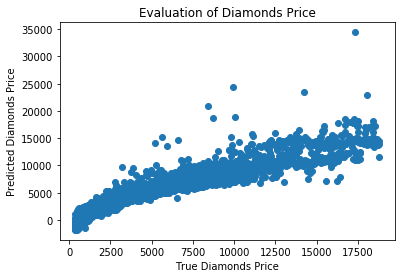

In [34]:
## REGRESIÓN LINEAL

lr = LinearRegression()
lr.fit(X_train, y_train)
confidence = lr.score(X_test, y_test)
print('Confianza = ', confidence)

predict1 = lr.predict(X_test)
resta = np.mean(y_test - predict1)
print('Error = ',resta)

## GRÁFICA DE COMPARACIÓN CON VALORES PREDECIDOS Y REALES
plt.scatter(y_test, lr.predict(X_test))
plt.xlabel('True Diamonds Price')
plt.ylabel('Predicted Diamonds Price')
plt.title('Evaluation of Diamonds Price')



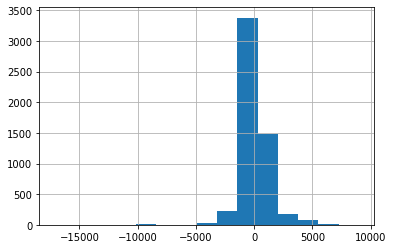

In [25]:
# EVALUAMOS LA DISTRIBUCIÓN DE LOS ERRORES 
# Si se encuentran en distribución normal entonces nuestro modelo es muy bueno

errors = y_test - lr.predict(X_test)
errors.hist(bins=15)

Precision =  0.9738095647179698
Error =  -4.976568055714918


Text(0.5, 1.0, 'Evaluation of Diamonds Price')

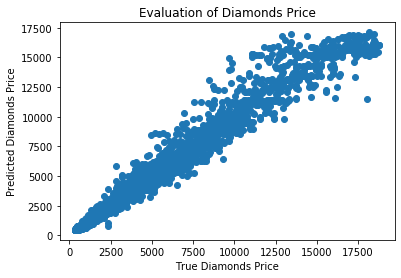

In [36]:
## BOSQUES ALEATORIOS

bar = RandomForestRegressor(n_estimators = 300, max_depth = 8)
bar.fit(X_train, y_train)
precision = bar.score(X_test, y_test)
print('Precision = ', precision)

predict2 = bar.predict(X_test)
resta = np.mean(y_test - predict2)
print('Error = ',resta)

plt.scatter(y_test, bar.predict(X_test))
plt.xlabel('True Diamonds Price')
plt.ylabel('Predicted Diamonds Price')
plt.title('Evaluation of Diamonds Price')

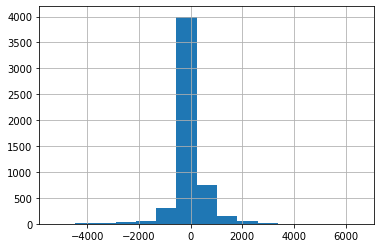

In [37]:
# EVALUAMOS LA DISTRIBUCIÓN DE LOS ERRORES 
# Si se encuentran en distribución normal entonces nuestro modelo es muy bueno

errors = y_test - bar.predict(X_test)
errors.hist(bins=15)

We can see that our model is doing a pretty good job at estimating diamonds prices.

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

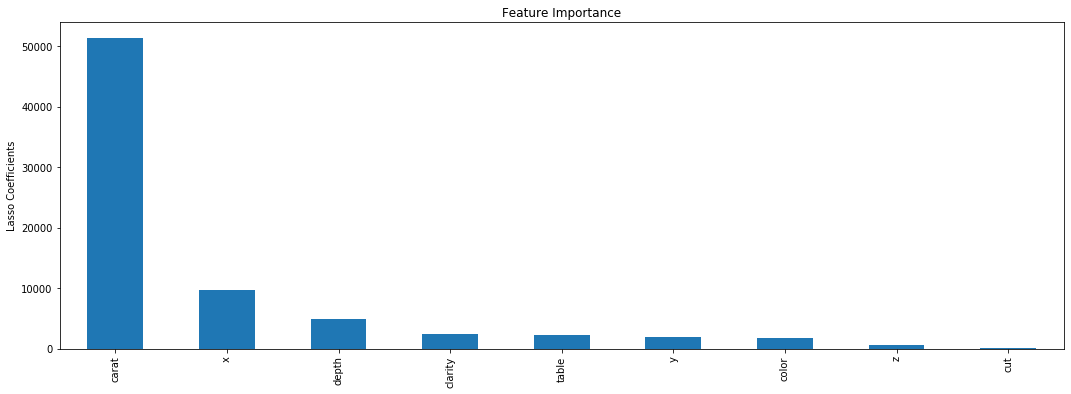

In [16]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')